# COVID-19 Mundo.

- Utilizando os datasets que do JOHNS HOPKINS link: https://github.com/CSSEGISandData/COVID-19, foram feitas análises e criado um dataset apenas com os dados da pandemia no Brasil.

## 1.0 Importando as bibliotecas e carregando os arquivos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
url_2='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [4]:
url_3= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [5]:
dados_covid19 = pd.read_csv(url, sep=',')

In [6]:
dados_deaths_covid19 = pd.read_csv(url_2, sep=',')

In [7]:
dados_recovered_covid19 = pd.read_csv(url_3, sep=',')

## 2.0 Tratando os dados dos datasets da covid 19.

In [8]:
dados_covid19 = dados_covid19.drop(columns=['Province/State', 'Lat','Long'])
dados_covid19 = dados_covid19.set_index('Country/Region')
dados_covid19.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836


In [9]:
dados_deaths_covid19 = dados_deaths_covid19.groupby('Country/Region').sum()
dados_deaths_covid19 = dados_deaths_covid19.drop(columns=['Lat','Long'],axis=1)
dados_deaths_covid19.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2427,2427,2427,2428,2428,2430,2430,2430,2432,2433,2435,2436,2438,2442,2443,2443,2444,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462,2462,2463,2464,2466,2466
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1543,1555,1567,1582,1600,1617,1636,1653,1666,1681,1696,1715,1736,1756,1775,1796,1816,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122,2133,2137,2145,2156,2171
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2935,2939,2943,2945,2947,2950,2954,2958,2961,2964,2967,2970,2973,2977,2979,2983,2987,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053,3055,3057,3061,3066,3069
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,109,110,110,110,110,110,110,110,110,112,112,112,112,112,112,112,112,112,112,112,113,113,113,113,113,113,113,113,113,113,114
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,491,492,493,494,496,498,498,498,499,499,500,501,502,504,506,508,508,510,510,511,511,512,514,515,516,516,517,519,520,521,521,522,522,522,524,526,527,530,530,532


In [10]:
dados_recovered_covid19 = dados_recovered_covid19.drop(columns=['Province/State', 'Lat','Long'])
dados_recovered_covid19 = dados_recovered_covid19.set_index('Country/Region')
dados_recovered_covid19.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48392,48395,48433,48514,48626,48798,48803,48820,48834,48895,48967,49086,49281,49285,49288,49333,49344,49347,49359,49362,49362,49369,49378,49402,49409,49499,49499,49499,49471,49477,49481,49499,49536,49664,49681,49681,49737,49743,49752,49802
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55983,56764,57736,58794,59684,60675,61605,62533,63329,64318,65403,66309,67158,68007,68969,69773,70413,71173,72076,72853,73610,74352,75190,75887,76784,77498,78259,79131,79821,80483,81061,81810,82554,83264,83954,84625,85147,85846,86497,87193
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,75816,75999,76168,76330,76489,76640,76797,76940,77076,77225,77382,77537,77683,77842,77976,78098,78234,78377,78524,78672,78824,78946,79064,79187,79319,79428,79556,79672,79783,79887,79994,80103,80219,80347,80455,80566,80659,80887,80981,81065
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9868,9911,9965,10022,10066,10101,10146,10170,10206,10245,10285,10319,10356,10394,10429,10446,10475,10501,10560,10564,10584,10599,10626,10661,10685,10708,10708,10754,10775,10796,10795,10861,10883,10904,10925,10952,10973,11014,11050,11082
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18790,18795,18884,18929,18951,18972,18991,19005,19013,19190,19207,19221,19238,19307,19315,19322,19400,19410,19509,19553,19624,19640,19647,19657,19677,19761,19827,19835,19848,19850,19948,19971,20028,20032,20065,20068,20073,20090,20099,20172


In [17]:
def df_by_country(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

In [18]:
confirmed = df_by_country(dados_covid19)
deaths = df_by_country(dados_deaths_covid19)
recovered = df_by_country(dados_recovered_covid19)

In [19]:
informations = [confirmed, deaths, recovered ]

covid_19 = pd.concat(informations, axis=1)
covid_19.head()

,3/24/21,3/24/21,3/24/21
Country/Region,,,
Afghanistan,56192,2466,49802
Albania,122295,2171,87193
Algeria,116438,3069,81065
Andorra,11638,114,11082
Angola,21836,532,20172


- Renomeando as colunas.

In [20]:
covid_19.columns = ['casos_confirmados','mortes','recuperados']
covid_19.head()

,casos_confirmados,mortes,recuperados
Country/Region,,,
Afghanistan,56192,2466,49802
Albania,122295,2171,87193
Algeria,116438,3069,81065
Andorra,11638,114,11082
Angola,21836,532,20172


## 3.0 Calculando a taxa de letalidade.

- Taxa de letalidade no mundo.

In [21]:
sum_up = covid_19.sum()
sum_up

casos_confirmados    124777130
mortes                 2743502
recuperados           70786662
dtype: int64

In [35]:
taxa_let_mundo = sum_up['mortes'] / sum_up['casos_confirmados'] * 100
taxa_let_mundo_2 = sum_up['mortes'] / ( sum_up['mortes'] + sum_up['recuperados']) *100

print(taxa_let_mundo)
print(taxa_let_mundo_2)


2.1987218330795075
3.731124549103413


- Taxa de letalidade por país.

In [24]:
letalidade_1 = covid_19['mortes'] / covid_19['casos_confirmados'] * 100
covid_19['letalidade_1'] = letalidade_1
letalidade_2 = covid_19['mortes'] / ( covid_19['mortes'] + covid_19['recuperados']) *100
covid_19['letalidade_2'] = letalidade_2
covid_19.head()

,casos_confirmados,mortes,recuperados,letalidade_1,letalidade_2
Country/Region,,,,,
Afghanistan,56192,2466,49802,4.388525,4.717992
Albania,122295,2171,87193,1.775216,2.429390
Algeria,116438,3069,81065,2.635737,3.647752
Andorra,11638,114,11082,0.979550,1.018221
Angola,21836,532,20172,2.436344,2.569552


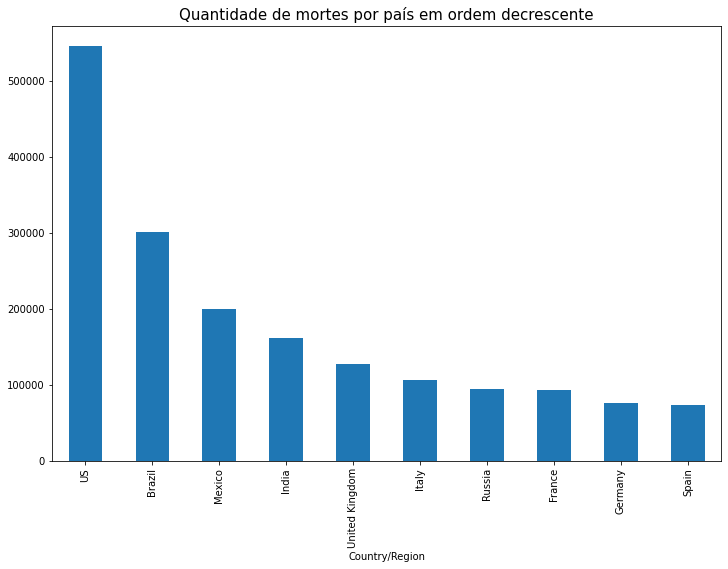

In [80]:
plt.figure(figsize=(12,8))
covid_19['mortes'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Quantidade de mortes por país em ordem decrescente', fontsize=15)
plt.show()

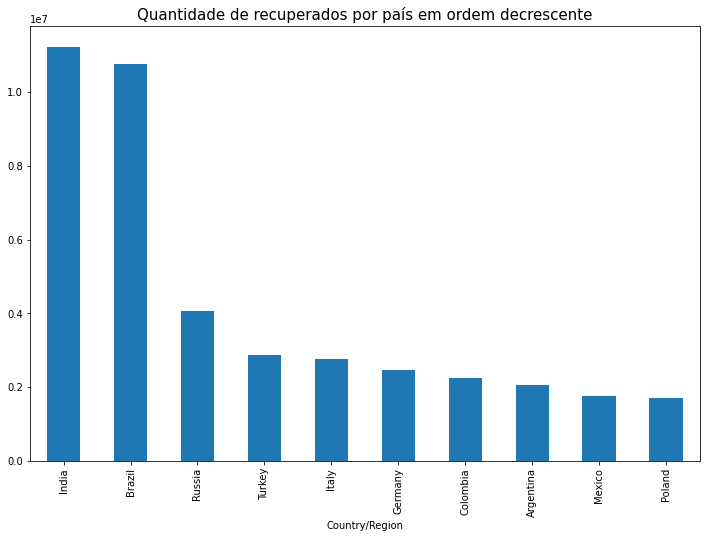

In [79]:
plt.figure(figsize=(12,8))
covid_19['recuperados'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Quantidade de recuperados por país em ordem decrescente', fontsize=15)
plt.show()

In [68]:
covid_19.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
casos_confirmados,192.0,649880.89,2561614.19,1.0,7048.75,77597.00,293227.00,30011839.00
mortes,192.0,14289.07,51104.02,0.0,106.50,876.00,6065.50,545264.00
recuperados,192.0,368680.53,1230824.47,0.0,4524.25,38648.00,214223.75,11231650.00
letalidade_1,192.0,2.06,2.45,0.0,0.99,1.67,2.53,22.22
letalidade_2,192.0,5.67,16.18,0.0,1.16,1.88,3.46,100.00


In [73]:
covid_19.query('letalidade_1 > 6')

,casos_confirmados,mortes,recuperados,letalidade_1,letalidade_2
Country/Region,,,,,
MS Zaandam,9,2,7,22.222222,22.222222
Mexico,2208755,199627,1748317,9.037987,10.248087
Sudan,31282,2028,23990,6.482961,7.794604
Syria,17896,1195,11907,6.677470,9.120745
Yemen,3703,800,1577,21.604105,33.655869


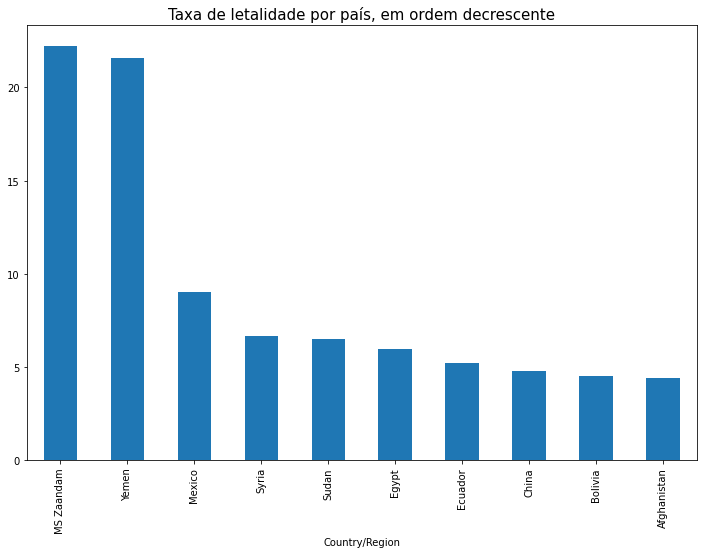

In [88]:
plt.figure(figsize=(12,8))
covid_19['letalidade_1'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Taxa de letalidade por país, em ordem decrescente', fontsize=15)
plt.show()

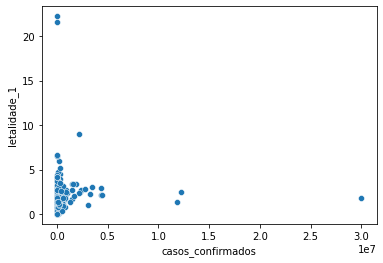

In [42]:
sns.scatterplot(x='casos_confirmados', y='letalidade_1',data=covid_19)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


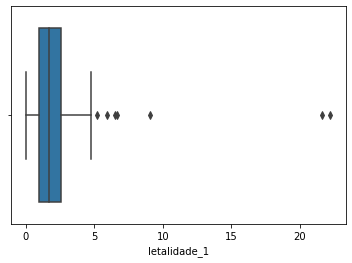

In [51]:
sns.boxplot(covid_19['letalidade_1'])

In [64]:
covid_19.query('casos_confirmados > 1000')

,casos_confirmados,mortes,recuperados,letalidade_1,letalidade_2
Country/Region,,,,,
Afghanistan,56192,2466,49802,4.388525,4.717992
Albania,122295,2171,87193,1.775216,2.429390
Algeria,116438,3069,81065,2.635737,3.647752
Andorra,11638,114,11082,0.979550,1.018221
Angola,21836,532,20172,2.436344,2.569552
...,...,...,...,...,...
Vietnam,2576,35,2265,1.358696,1.521739
West Bank and Gaza,230076,2501,203340,1.087032,1.215015
Yemen,3703,800,1577,21.604105,33.655869


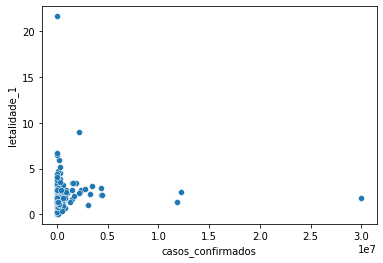

In [65]:
sns.scatterplot(x='casos_confirmados', y='letalidade_1',data=covid_19.query('casos_confirmados > 1000'))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


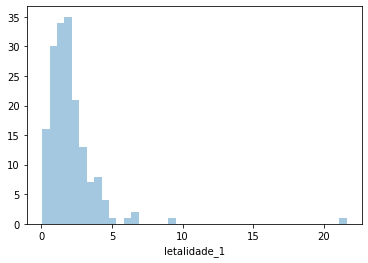

In [62]:
sns.distplot(covid_19.query('casos_confirmados > 1000')['letalidade_1'], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


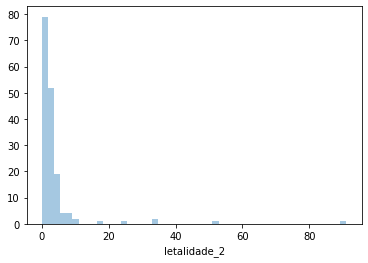

In [67]:
sns.distplot(covid_19.query('casos_confirmados > 1000')['letalidade_2'], kde=False)